# BACS2203 Articial Intelligence
## Heart Disease Prediction
### Group Members 
|Name|Student ID|
|:-- |--- |
|Wong Wey Pin|24WMR12868|
|Cheah Gon Yu|24WMR15329|
|Teoh Hon Hsi|21WMR12268|

# Import necessary libraries

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_curve, auc, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')



# Dataset

In [413]:
# Set style for plots
plt.style.use('ggplot')
%matplotlib inline

In [414]:
# Load the dataset
data = pd.read_csv('heart1.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Analysis

## Data Transformation, Data Preparation

In [415]:
# Data Transformation 
# check if the datatypes for the data needs to do tranform or not 
print(data.info())

# 1 float (decimal), 6 int and 5 object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [416]:

data['Sex'] = data['Sex'].replace(to_replace='M', value=1)
data['Sex'] = data['Sex'].replace(to_replace='F', value=2)
data['ChestPainType'] = data['ChestPainType'].replace(to_replace='TA', value=1)
data['ChestPainType'] = data['ChestPainType'].replace(to_replace='ATA', value=2)
data['ChestPainType'] = data['ChestPainType'].replace(to_replace='NAP', value=3)
data['ChestPainType'] = data['ChestPainType'].replace(to_replace='ASY', value=4)
data['RestingECG'] = data['ChestPainType'].replace(to_replace='Normal', value=1)
data['RestingECG'] = data['ChestPainType'].replace(to_replace='ST', value=2)
data['RestingECG'] = data['ChestPainType'].replace(to_replace='LVH', value=3)
data['ExerciseAngina'] = data['ExerciseAngina'].replace(to_replace='Y', value=1)
data['ExerciseAngina'] = data['ExerciseAngina'].replace(to_replace='N', value=2)
data['ST_Slope'] = data['ST_Slope'].replace(to_replace='Up', value=1)
data['ST_Slope'] = data['ST_Slope'].replace(to_replace='Flat', value=2)
data['ST_Slope'] = data['ST_Slope'].replace(to_replace='Down', value=3)

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,2,0.0,1,0
1,49,2,3,160,180,0,3,156,2,1.0,2,1
2,37,1,2,130,283,0,2,98,2,0.0,1,0
3,48,2,4,138,214,0,4,108,1,1.5,2,1
4,54,1,3,150,195,0,3,122,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,1,132,2,1.2,2,1
914,68,1,4,144,193,1,4,141,2,3.4,2,1
915,57,1,4,130,131,0,4,115,1,1.2,2,1
916,57,2,2,130,236,0,2,174,2,0.0,2,1


In [417]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [418]:
# Dataset information
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [419]:
# Statistical summary
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,3.251634,132.396514,198.799564,0.233115,3.251634,136.809368,1.595861,0.887364,1.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.931031,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,1.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,3.000000,120.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,4.000000,138.000000,2.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,4.000000,156.000000,2.000000,1.500000,2.000000,1.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,4.000000,202.000000,2.000000,6.200000,3.000000,1.000000


In [420]:
# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
data.head()

Dataset Shape: (918, 12)

First 5 rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,2,0.0,1,0
1,49,2,3,160,180,0,3,156,2,1.0,2,1
2,37,1,2,130,283,0,2,98,2,0.0,1,0
3,48,2,4,138,214,0,4,108,1,1.5,2,1
4,54,1,3,150,195,0,3,122,2,0.0,1,0


In [421]:

data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Data Visualization

## Countplot

In [422]:
from matplotlib import rcParams

# set larger figure size (enlarge)
rcParams['figure.figsize'] = 11, 8

## 1. Age

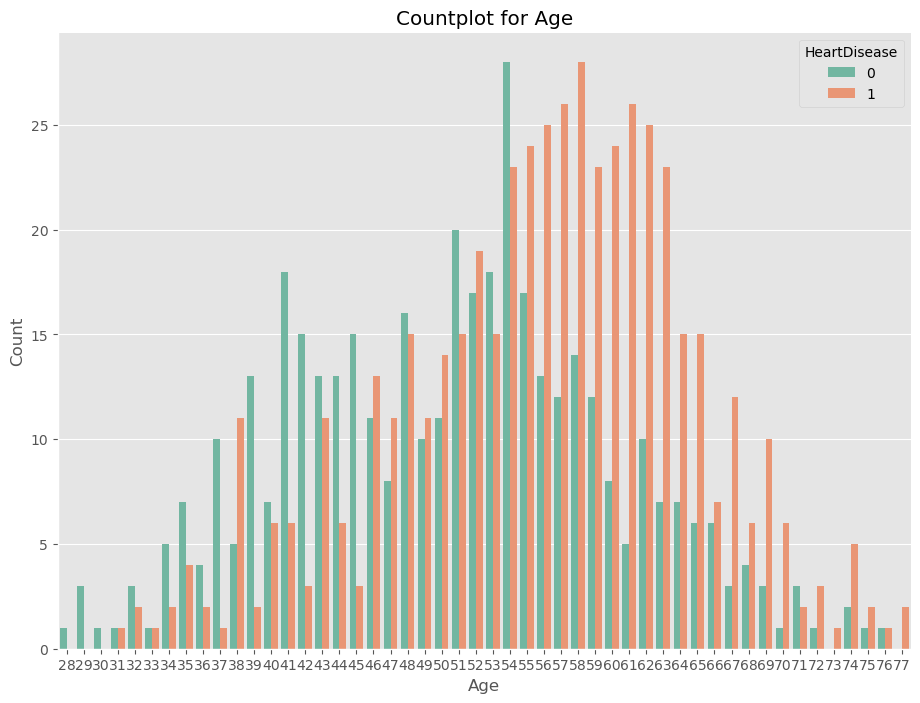

In [423]:

sns.countplot(data = data, x='Age', hue='HeartDisease', palette='Set2')

plt.title('Countplot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
sns.despine()

plt.show()

# 2. ChestPainType
1: TA, 2: ATA, 3: NAP, 4: ASY

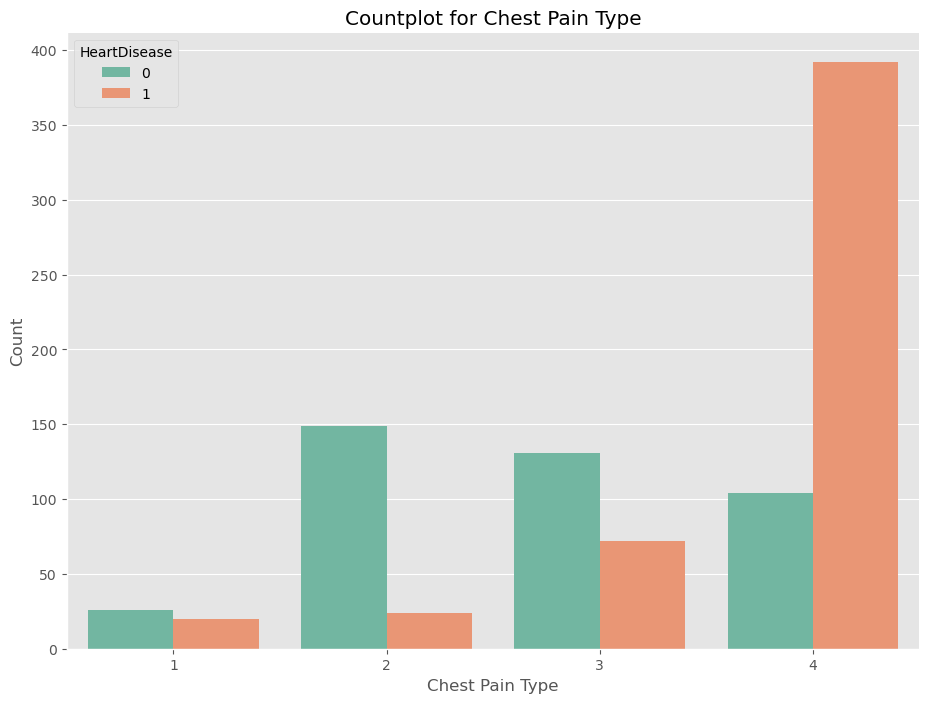

In [424]:

sns.countplot(data = data, x='ChestPainType', hue='HeartDisease', palette='Set2')

plt.title('Countplot for Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
sns.despine()

plt.show()

# 3. FastingBS
1: if FastingBS > 120, 0: otherwise

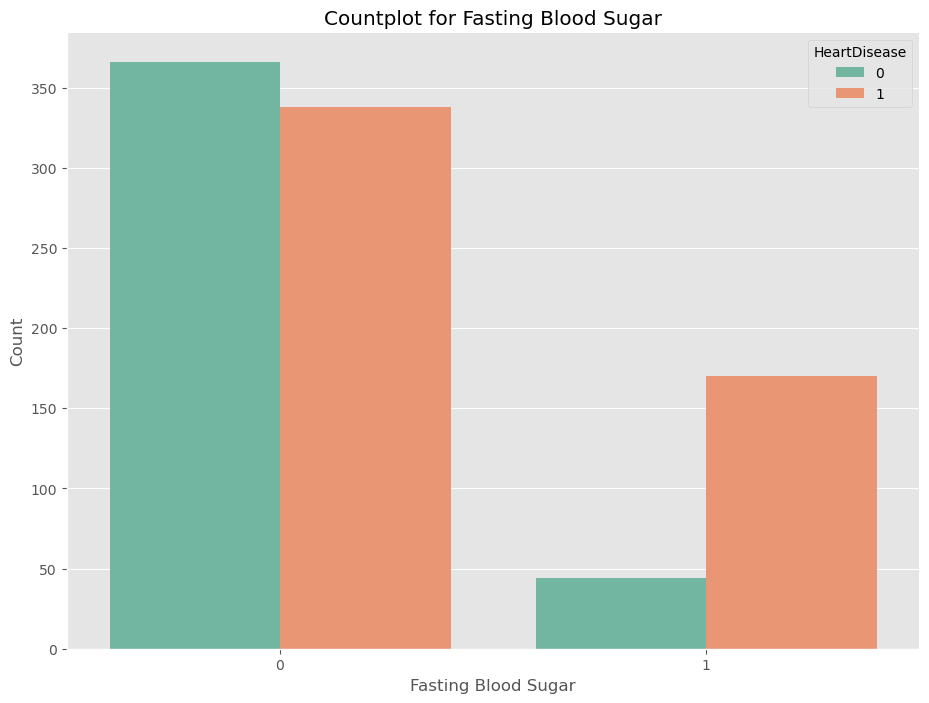

In [425]:

sns.countplot(data = data, x='FastingBS', hue='HeartDisease', palette='Set2')

plt.title('Countplot for Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
sns.despine()

plt.show()

# 4. RestingECG 
1: Normal, 2: ST, 3: LVH

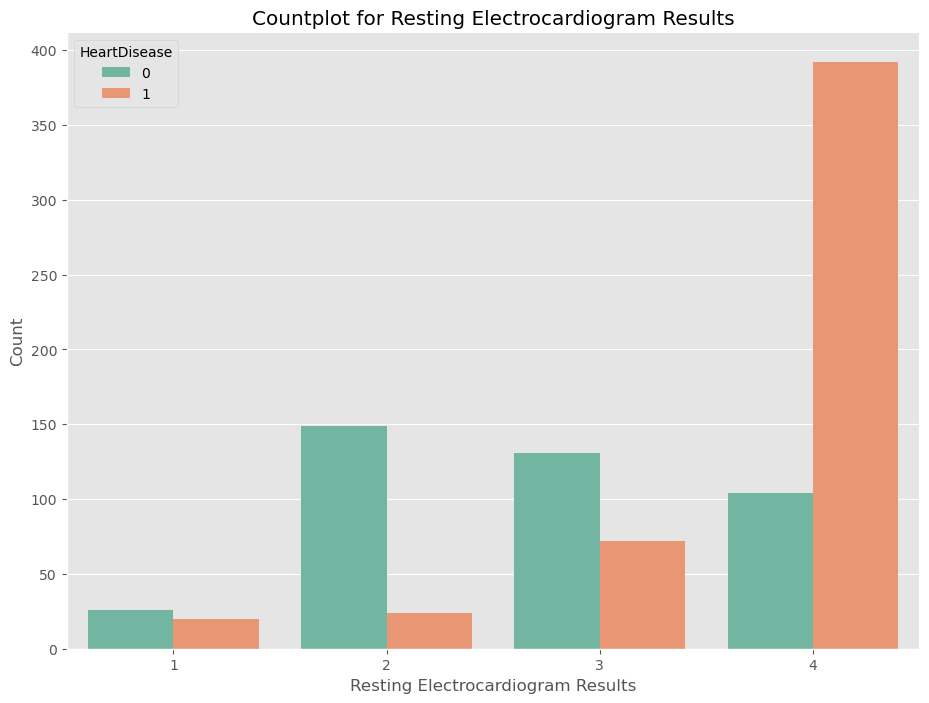

In [426]:

sns.countplot(data = data, x='RestingECG', hue='HeartDisease', palette='Set2')

plt.title('Countplot for Resting Electrocardiogram Results')
plt.xlabel('Resting Electrocardiogram Results')
plt.ylabel('Count')
sns.despine()

plt.show()

# 5. ExerciseAngina
1: Yes, 2: No

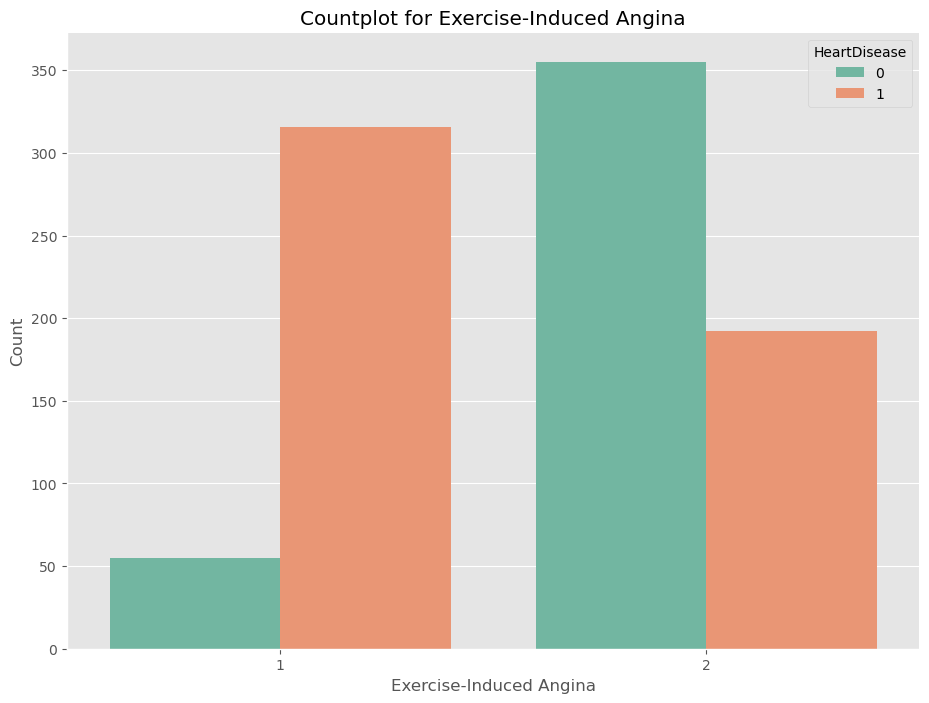

In [427]:

sns.countplot(data = data, x='ExerciseAngina', hue='HeartDisease', palette='Set2')

plt.title('Countplot for Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
sns.despine()

plt.show()

# 6. Countplot for Nominal Data

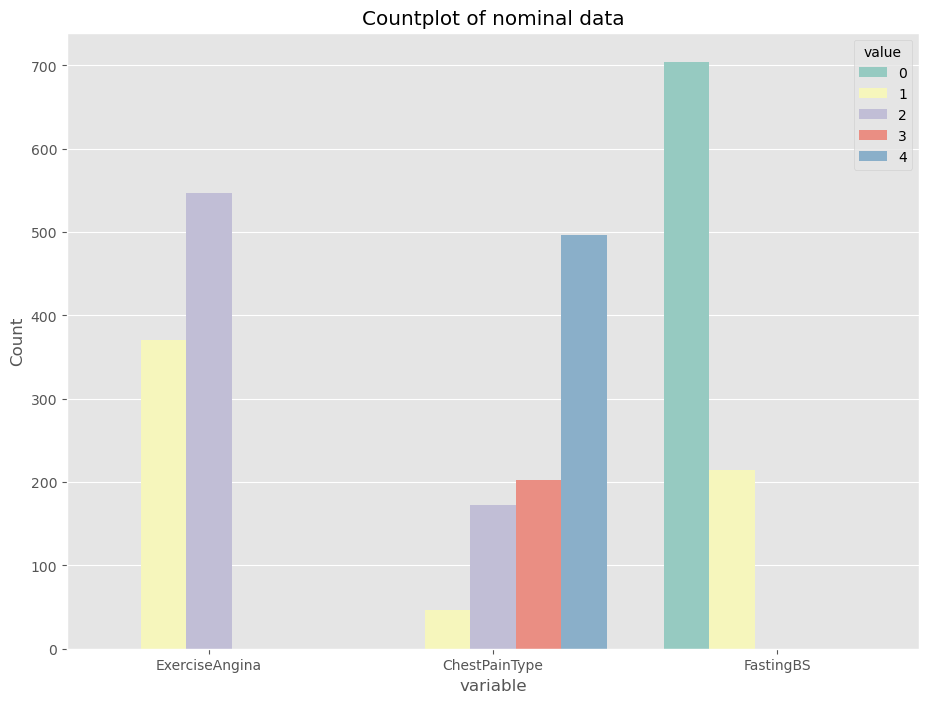

In [428]:

# ChestPainType, FastingBS, RestingECG
data_nominal = pd.melt(data.loc[:,['ExerciseAngina','ChestPainType', 'FastingBS']])
sns.countplot(x="variable", hue="value",data= data_nominal, palette='Set3')

plt.title('Countplot of nominal data')
plt.ylabel('Count')

plt.show()

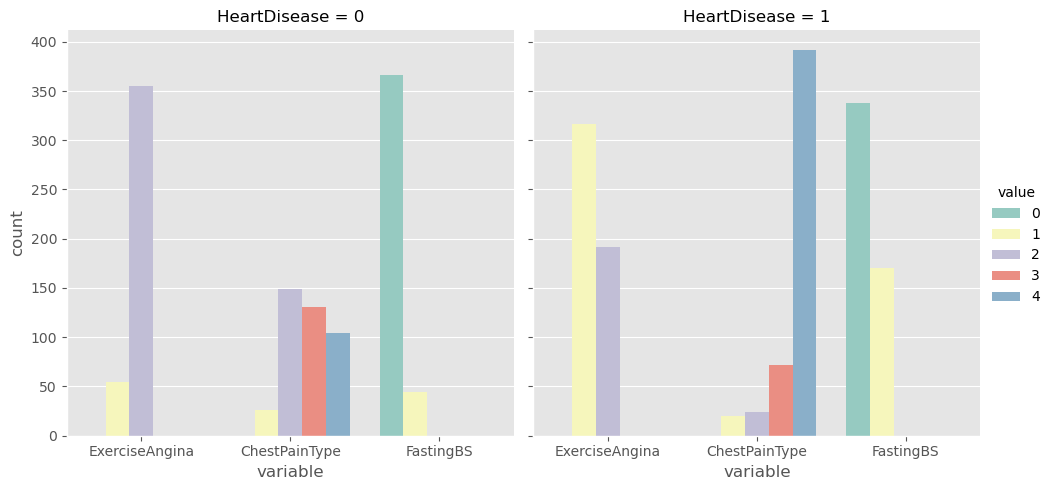

In [429]:

# observe nominal data by HeartDisease
data_norminal_label = pd.melt(data, id_vars=['HeartDisease'], value_vars=['ExerciseAngina','ChestPainType', 'FastingBS'])
sns.catplot(x="variable", hue="value", col="HeartDisease",data=data_norminal_label, kind="count", palette='Set3')

plt.show()

# Histogram

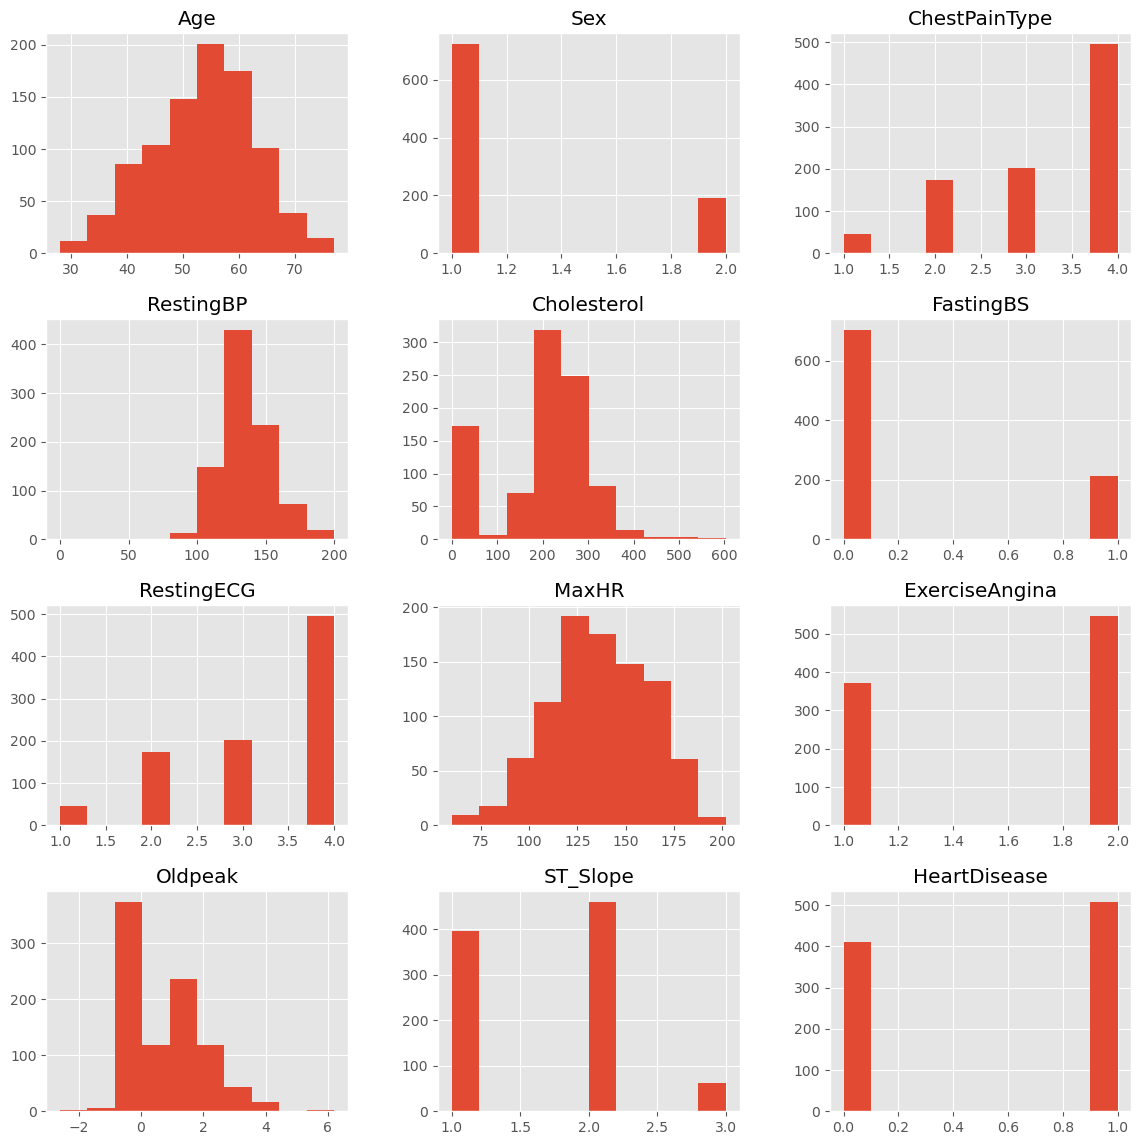

In [430]:
import matplotlib.pyplot as plt

numbers = pd.Series(data.columns)
data[numbers].hist(figsize = (14, 14))
plt.show()

# Heatmap

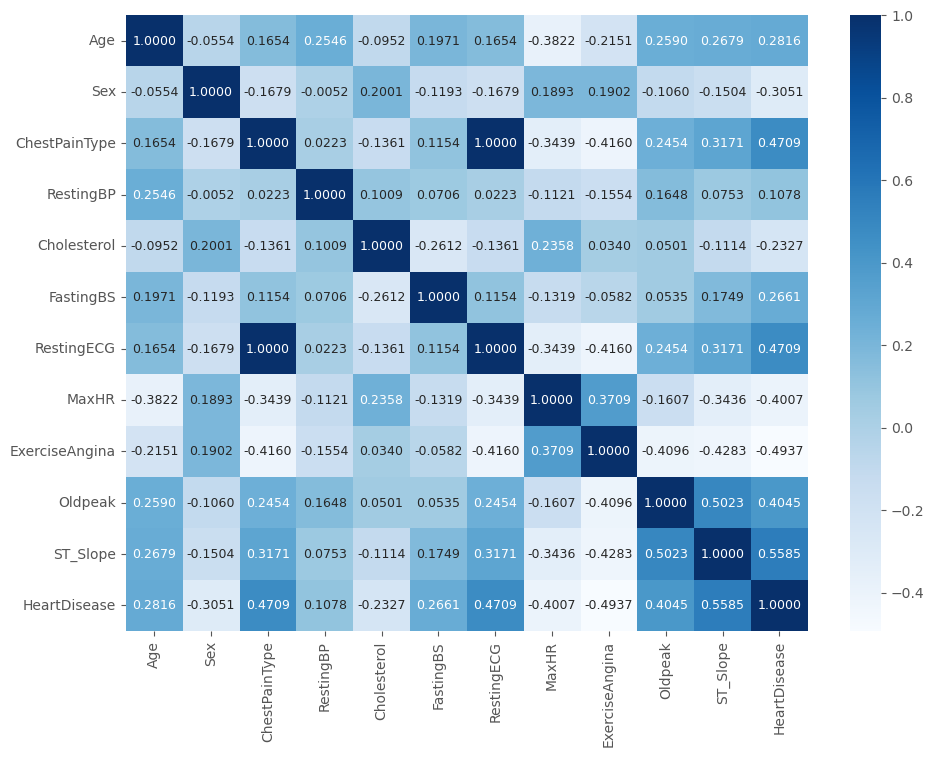

In [641]:

# Correlation Matrix - show corelation coefficient of variables 
sns.heatmap(data.corr(), 
        cmap="Blues",
        fmt='.4f',
        annot=True,
        annot_kws={"size":9})

# display
plt.show()

In [642]:

# Show discrete data only 
data.loc[:,['Age','RestingBP', 'Oldpeak']].describe().round(4)

,Age,RestingBP,Oldpeak
count,917.0000,917.0000,917.0000
mean,53.5038,132.3991,0.8878
std,9.4353,18.5241,1.0671
min,28.0000,0.0000,-2.6000
25%,47.0000,120.0000,0.0000
50%,54.0000,130.0000,0.6000
75%,60.0000,140.0000,1.5000
max,77.0000,200.0000,6.2000


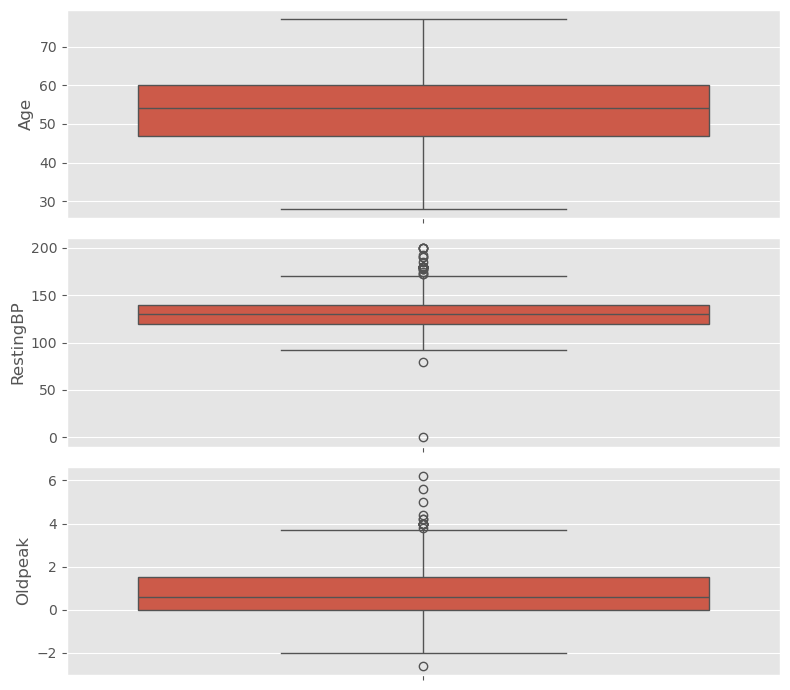

In [643]:

# Check data is category OR discrete
import warnings

warnings.simplefilter("ignore")

fig, axs = plt.subplots(3,figsize=(8,7))

ptl1 = sns.boxplot(data['Age'], ax = axs[0])
ptl2 = sns.boxplot(data['RestingBP'], ax = axs[1])
ptl3 = sns.boxplot(data['Oldpeak'], ax = axs[2])

plt.tight_layout()
plt.show()

In [644]:
# Check for duplicates and remove them if any
print(f"Number of duplicates: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Shape after removing duplicates: {data.shape}")

Number of duplicates: 0
Shape after removing duplicates: (917, 12)


In [645]:
# Separate features and target variable
x_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

In [646]:

# Split data to test and train (train: 80%, test: 20%)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_data, y_data,test_size=0.2,random_state=3)

print(f"Training set shape: {Xtrain.shape}")
print(f"Testing set shape: {Xtest.shape}")

Training set shape: (733, 11)
Testing set shape: (184, 11)


# Modeling  Classification

## K-Nearest Neighbour (KNN) - Wong Wey Pin

In [647]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("KNN Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

KNN Performance:
Accuracy: 0.9022
Precision: 0.9200
Recall: 0.9020
F1 Score: 0.9109


# Logistic Regression - Teoh Hon Hsi

In [648]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

Logistic Regression Performance:
Accuracy: 0.8913
Precision: 0.8727
Recall: 0.9412
F1 Score: 0.9057


# Decision Tree - Cheah Gon Yu

In [649]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")

Decision Tree Performance:
Accuracy: 0.7772
Precision: 0.8280
Recall: 0.7549
F1 Score: 0.7897


# Model Comparison

In [650]:

# Create a comparison dataframe
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_knn, accuracy_lr, accuracy_dt],
    'Precision': [precision_knn, precision_lr, precision_dt],
    'Recall': [recall_knn, recall_lr, recall_dt],
    'F1 Score': [f1_knn, f1_lr, f1_dt]
})

# Sort by accuracy
models_comparison = models_comparison.sort_values(by='Accuracy', ascending=False)
models_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.902174,0.920000,0.901961,0.910891
1,KNN,0.891304,0.872727,0.941176,0.905660
2,Decision Tree,0.777174,0.827957,0.754902,0.789744


In [651]:
# print()
print("Max of Accuracy  : ", max(accuracy_knn, accuracy_lr, accuracy_dt))
print("Max of Precision : ", max(precision_knn, precision_lr, precision_dt))
print("Max of Recall    : ", max(recall_knn, recall_lr, recall_dt))
print("Max of F1 Score  : ", max(f1_knn, f1_lr, f1_dt))

Max of Accuracy  :  0.9021739130434783
Max of Precision :  0.92
Max of Recall    :  0.9411764705882353
Max of F1 Score  :  0.9108910891089109


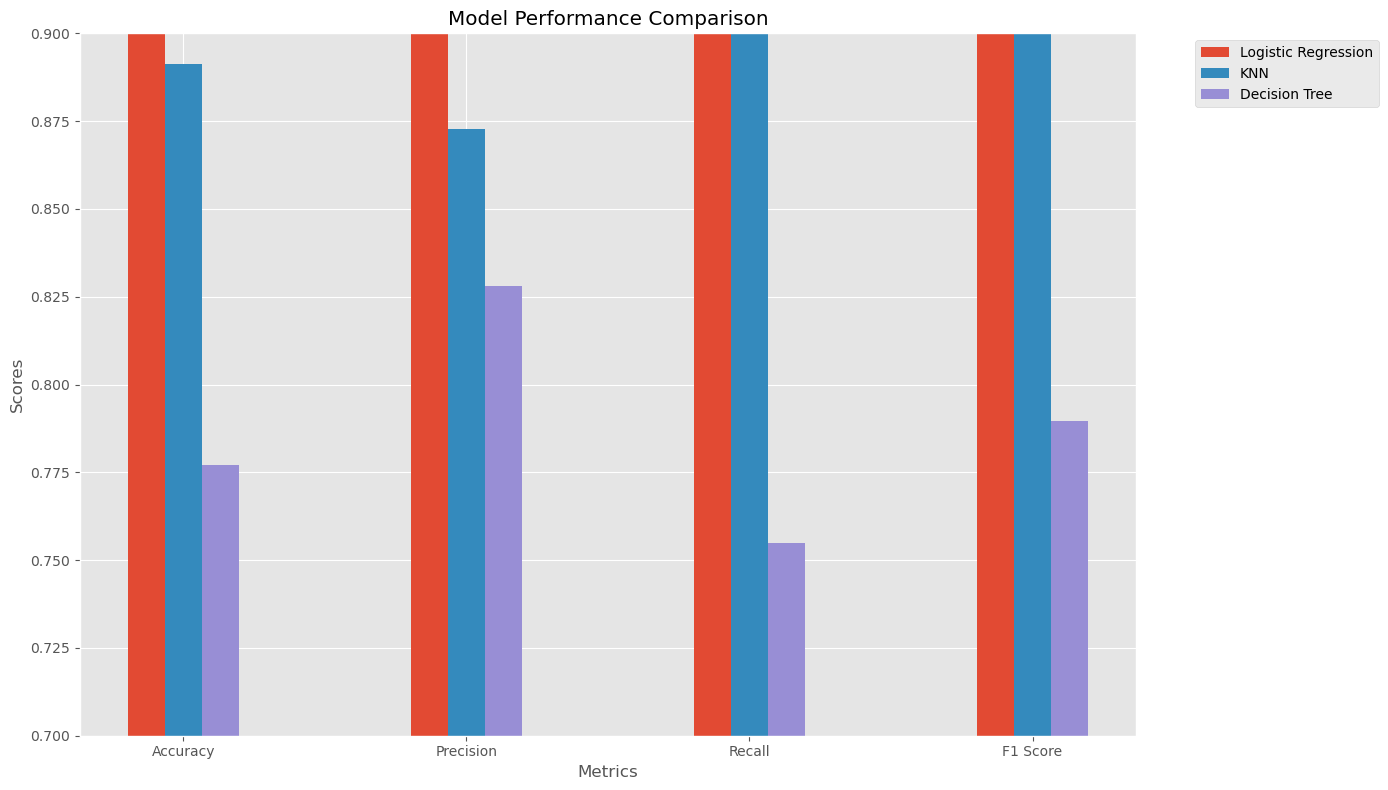

In [652]:
# Visual comparison of model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = models_comparison['Model'].values

x = np.arange(len(metrics))
width = 0.13

fig, ax = plt.subplots(figsize=(14, 8))
for i, model in enumerate(models):
    values = models_comparison[models_comparison['Model'] == model][metrics].values.flatten()
    ax.bar(x + (i * width) - (width * (len(models)-1)/2), values, width, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.7, 0.9)
plt.tight_layout()
plt.show()

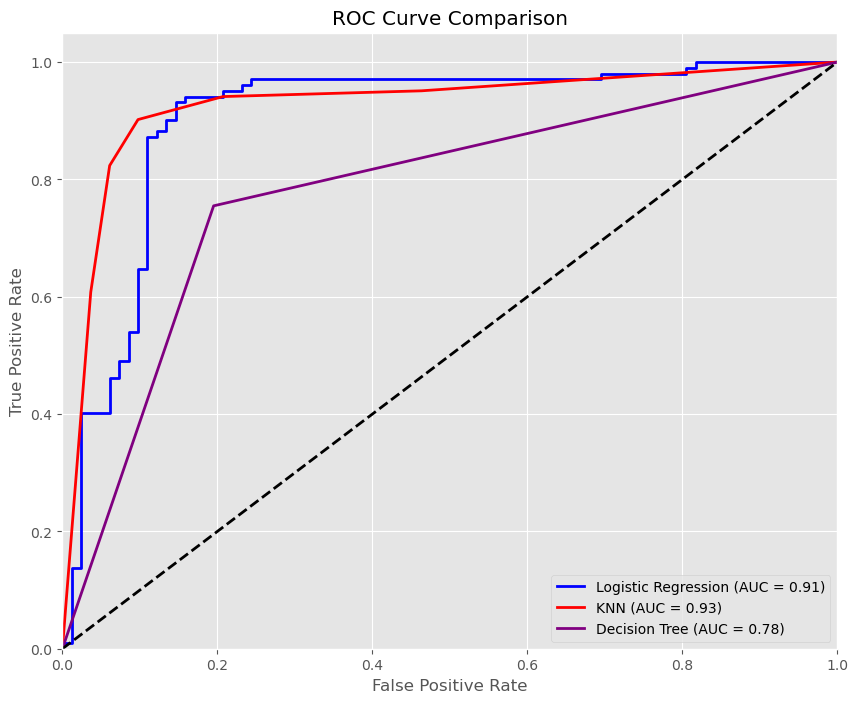

In [653]:
# ROC Curve comparison
fig, ax = plt.subplots(figsize=(10, 8))

# Plot ROC curve for each model
models = {
    'Logistic Regression': (y_pred_prob_lr, 'blue'),
    'KNN': (y_pred_prob_knn, 'red'),
    'Decision Tree': (y_pred_prob_dt, 'purple'),
    
}

for model_name, (y_pred_prob, color) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=color, lw=2, 
            label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Comparison')
ax.legend(loc='lower right')
plt.show()

# Confusion matrices for each model

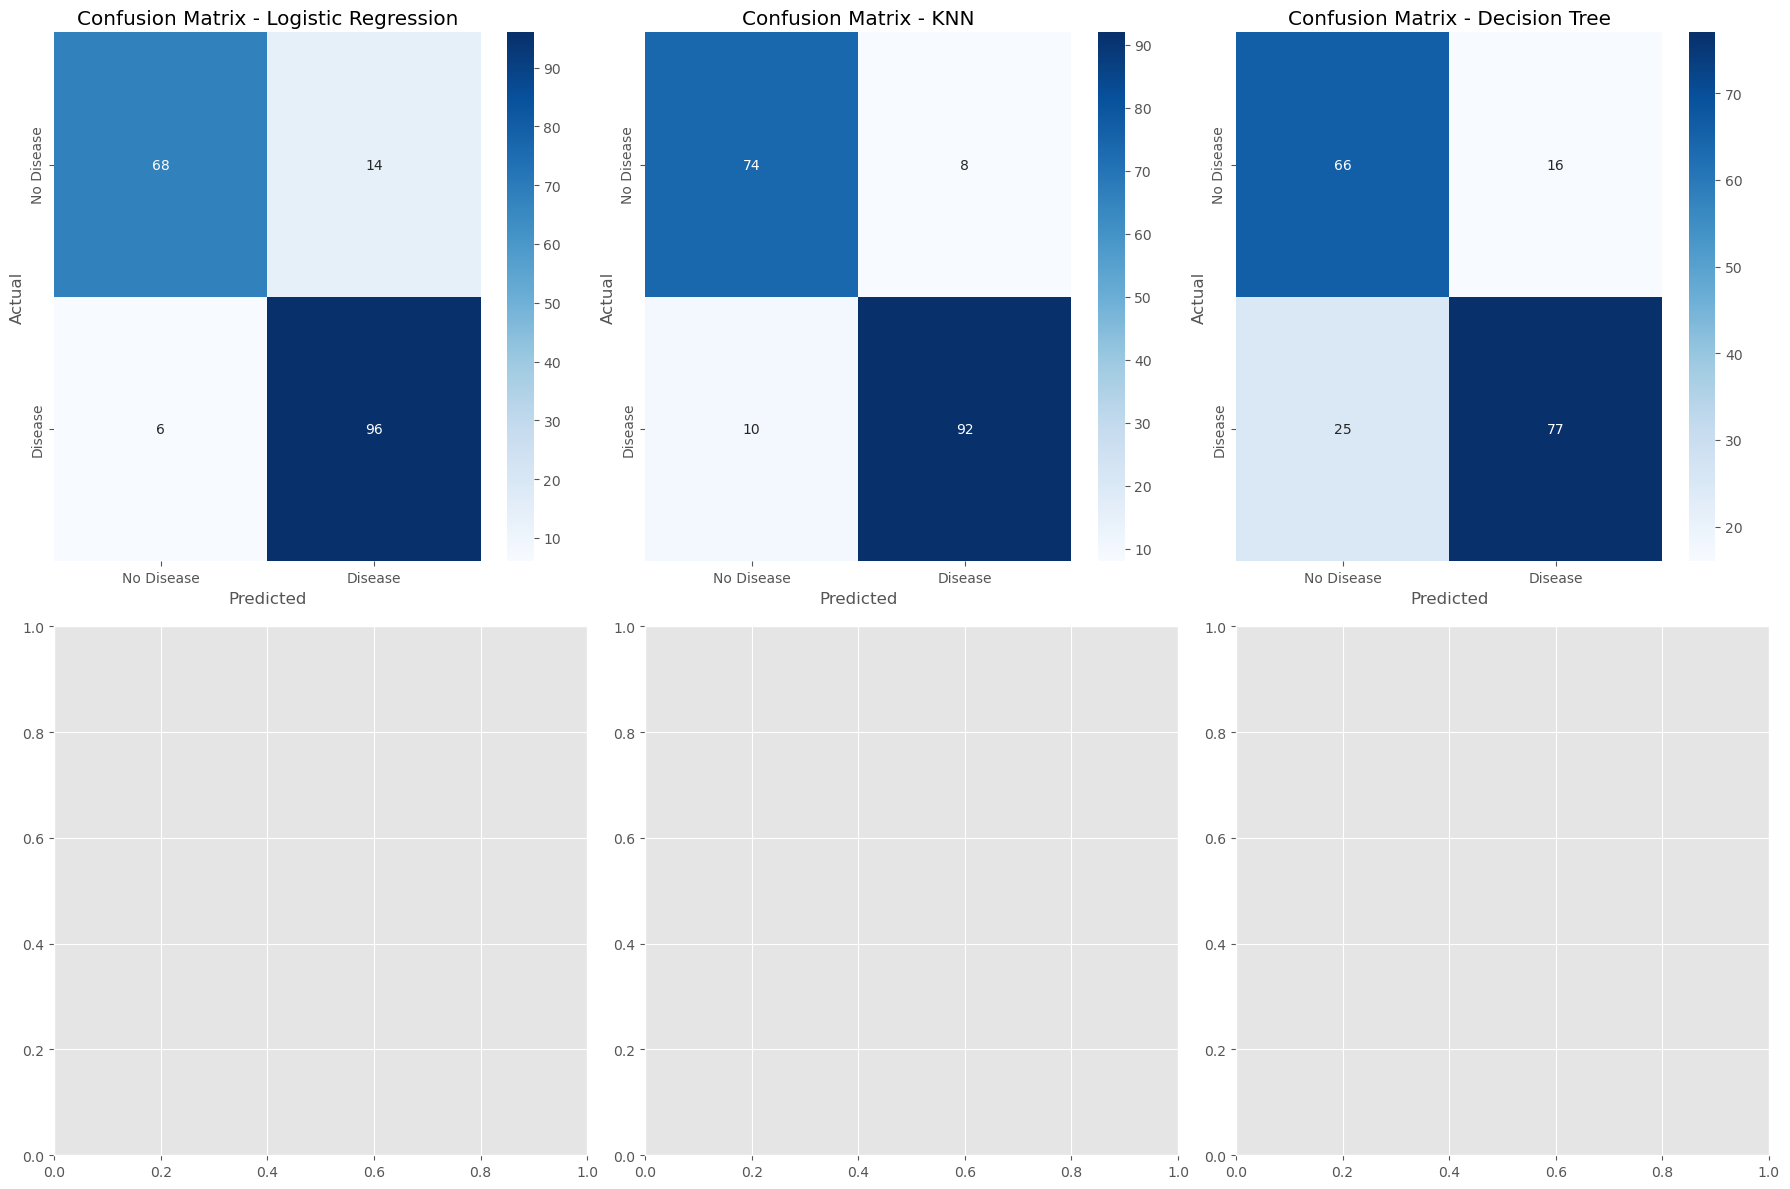

In [654]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
models = [('Logistic Regression', y_pred_lr), 
          ('KNN', y_pred_knn),
          ('Decision Tree', y_pred_dt)]

for i, (name, y_pred) in enumerate(models):
    row, col = i // 3, i % 3
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'],
                ax=axes[row, col])
    axes[row, col].set_title(f'Confusion Matrix - {name}')
    axes[row, col].set_ylabel('Actual')
    axes[row, col].set_xlabel('Predicted')

plt.tight_layout()
plt.show()